# Lab 3 — clustering

In [27]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import spatial
from sklearn import metrics
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool, ResetTool, PanTool, WheelZoomTool, SaveTool
output_notebook()
from bokeh.palettes import Dark2_8
import json
import itertools
import random
import collections

%matplotlib inline
plt.style.use("ggplot")

Loading BokehJS ...

In [28]:
#We load the tags Coordinates
with open("tagsCoordinates.pickle", "rb") as f:
    tagsCoord = pickle.load(f, encoding="utf-8")

In [29]:
from sklearn.cluster import KMeans

coordinates = np.zeros([len(tagsCoord),5])

#We modify the tags coordinates in order to be usable for the plot
i = 0
for tags,coord in tagsCoord.items():
    coordinates[i,0] = coord[0]
    coordinates[i,1] = coord[1]
    coordinates[i,2] = coord[2]
    coordinates[i,3] = coord[3]
    coordinates[i,4] = coord[4]
    i += 1


In [30]:
#Draw The plot
def drawPlot(array,color):
    source = ColumnDataSource(
        data={
            "x": [x[0] for x in array ],
            "y": [x[1] for x in array],
            "name": [x for x in tagsCoord.keys()],
            "color": [Dark2_8[x] for x in color],
        })

    hover = HoverTool(
        tooltips=[
            ("Name", "@name"),
        ])
    tools = [hover, ResetTool(), PanTool(), WheelZoomTool(), SaveTool()]

    p = figure(plot_width=960, plot_height=360, tools=tools, title="Mouse over the dots")
    p.circle("x", "y", source=source, size=20, color="color", alpha=0.5)
    return p

In [31]:
#This function cluster the datausing the k-means clustering algorithm for a given k and array
def computeCluster(k,array):
    kmeans = KMeans(n_clusters=k).fit(array)
    color =[]   
    for item in array:
        dist = []
        for d in range(k):
            #compute the distance between the nodes and the cluster_centers
            dist.append(spatial.distance.euclidean(item,kmeans.cluster_centers_[d]))
        idxColor = np.argsort(dist)
        color.append(idxColor[0])
    
    return drawPlot(array,color)

In [32]:
import itertools

combi = itertools.combinations([0,1,2,3,4], 2)

#We visualize the cluster for k = (2,3,4,5) and for each principal directions
for item in combi:
    for i in range(2,6):
        col1 = coordinates[:,item[0]]
        col2 = coordinates[:,item[1]]
        array = np.column_stack((col1,col2))
        s = computeCluster(i,array)
        show(s,notebook_handle=True)

Exercise 3.11)

The first principal direction, associate with every other ones separate the cluster well.

In [36]:
#Create dictionary
movies = sc.textFile("/ix/ml-20m/movies.txt").map(json.loads).map(lambda x: (x['movieId'],x['genres'])).collect()
moviesDict = {}
for movie in movies:
    moviesDict[movie[0]] = movie[1]

                                                                  

In [37]:
#Compute Jaccard distance
def distance(a,b):
    temp = a+b
    temp2 = set(a).intersection(b)
    index = len(temp2)/len(temp)
    return 1-index
#Implement 2-medioids algorith
medioids=[]
exMedioids=[]
for i in range(2):
    medioids.append(random.choice(list(moviesDict.items())))
while medioids != exMedioids:
    clusters = [{},{}]
    exMedioids = medioids

    
    for key,value in moviesDict.items():
        index = -1
        minValue = 500
        for i,medioid in enumerate(medioids):
            if distance(medioid[1],value) < minValue:
                index=i
                minValue = distance(medioid[1],value)
        clusters[index][key]=value
    for i in range(2):
        index = -1
        minValue = 500
        temp = clusters[i].items()
        
        for key,value in temp:
            sum = 0
            for key2,value2 in temp:
                if key != key2:
                    sum += distance(value,value2)
        if sum < minValue:
            minValue = sum
            medioids[i] = {key:value}
                    
                    
                    
    

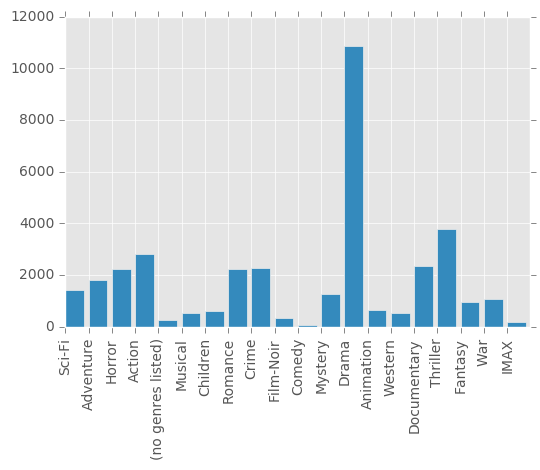

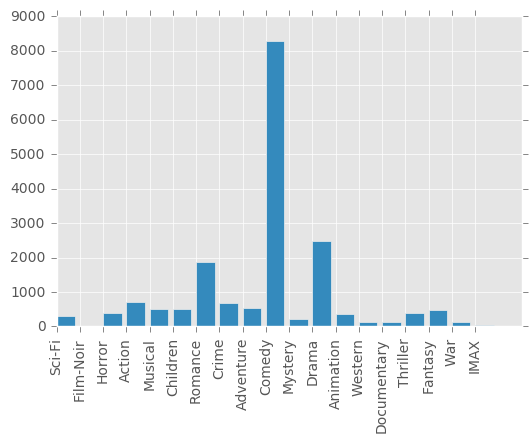

In [38]:
#Plot the frequency of genre
for i in range(2):
    genre =[]
    for genres in clusters[i].values():
        genre.extend(genres)
    genre = dict(collections.Counter(genre))
    x=range(len(list(genre.values())))
    ax=plt.subplot()
    ax.bar(x,list(genre.values()),tick_label=list(genre.keys()))
    ax.set_xticklabels(list(genre.keys()),rotation=90)
    plt.show()